<a href="https://colab.research.google.com/github/tarek-iub/habibi/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torchvision
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (3,3)) #define the image size

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [3]:
#transforming the PIL Image to tensors
trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())
testset = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transforms.ToTensor())

0it [00:00, ?it/s]

26427392it [00:01, 13835124.83it/s]                             


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 101824.43it/s]           
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


4423680it [00:01, 4304646.77it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


8192it [00:00, 30957.37it/s]            

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
#loading the training data from trainset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)
#loading the test data from testset
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [16]:

#iterating into the data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape) #shape of all 4 images
print(images[1].shape) #shape of one image
print(labels[1].item()) #label number

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
9


In [17]:
#taking the first image from batch of 4 images

img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [18]:
npimg = img.numpy()
print(npimg.shape)

(1, 28, 28)


In [19]:
np.squeeze(npimg).shape

(28, 28)

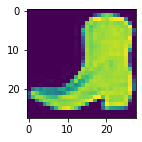

In [20]:
plt.figure(figsize = (2,2))
plt.imshow(np.squeeze(npimg))
plt.show()

In [0]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')
def imshow(img):
  npimg = img.numpy() #convert the tensor to numpy for displaying the image
  #for displaying the image, shape of the image should be height * width * channels 
  plt.imshow(np.transpose(npimg, (1, 2, 0))) 
  plt.show()

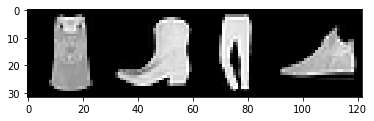

T-Shirt Ankle Boot Trouser Ankle Boot


In [22]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single convolutional layer

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        #single layer convolution
        self.conv1 = nn.Conv2d(1, 16, 3, padding = (1,1), stride = (2, 2))
    
    def forward(self, x):
        #execute forward pass
        x = self.conv1(x)
        return(x)

In [0]:
net = FirstCNN()

In [26]:
print(net)

FirstCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)


In [27]:
images.shape

torch.Size([4, 1, 28, 28])

In [28]:
#output from the convolution
out = net(images)
out.shape

torch.Size([4, 16, 14, 14])

In [29]:
#total parameters in a network
for param in net.parameters():
    print(param.shape, "Parameters")

torch.Size([16, 1, 3, 3]) Parameters
torch.Size([16]) Parameters


In [30]:
#plotting the output of convolution, taking the first channel
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(14, 14)


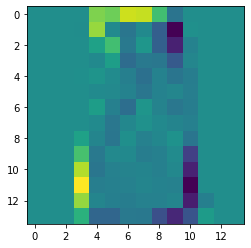

<Figure size 20000x20000 with 0 Axes>

In [31]:
#display the output in the first layer

plt.imshow(out[0, 0, :, :].detach().numpy())
plt.figure(figsize = (10,10), dpi = 2000)
plt.show()

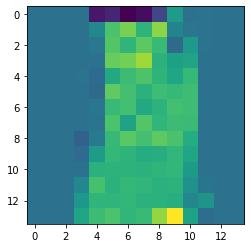

<Figure size 720x720 with 0 Axes>

In [38]:
#looking into the layer output, second layer output

plt.imshow(out[0, 1, :, :].detach().numpy())
plt.figure(figsize = (10,10))
plt.show()

## Deep Convolutional Layers

In [0]:
#creating custom convolution network using two blocks of 2D convolution
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        #create a cnn using nn.sequential
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),   # (N, 1, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [40]:
#create a class object and pass the input images to it.
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 24, 24])

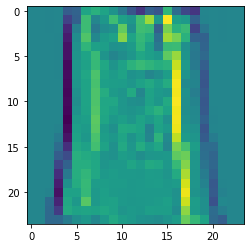

In [45]:
#visualize the convolution layer
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
#in this class, we will use AvgPool for averge pooling - sub sampling
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, 5),          # (N, 1, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(kernel_size = 2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [47]:
#create a class object and pass the input images to it.
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 4, 4])

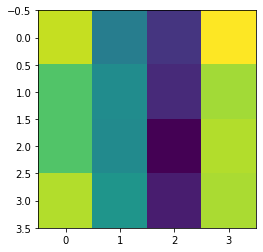

In [48]:
#visualize the layer outputs
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

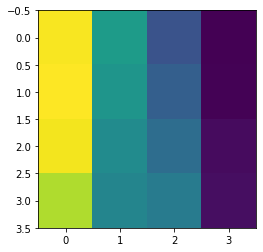

In [49]:
plt.imshow(out[0, 1, :, :].detach().numpy())
plt.show()

## LeNet

In [0]:
#class implementing the lenet network
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size = 5), #(N, 1, 28, 28) -> (N, 6, 24, 24)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 24, 24) -> (N, 6, 12, 12)
            
            nn.Conv2d(6, 16, kernel_size = 5), #(N, 6, 12, 12) -> (N, 6, 8, 8)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2)) #(N, 6, 8, 8) -> (N, 16, 4, 4)
    
        self.fc_model = nn.Sequential(
            nn.Linear(256, 120), # (N, 256) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120, 84), # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84, 10))  # (N, 84)  -> (N, 10))
            
    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        #print(x)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [0]:
net = LeNet()
#running the lenet cnn
out = net(images)

In [52]:
#printing the class probabilities for 4 different images
print(out)

tensor([[-0.0890, -0.0097,  0.0060,  0.0308, -0.0205,  0.0774,  0.0828, -0.0724,
          0.0135,  0.1268],
        [-0.0657, -0.0064,  0.0288,  0.0364, -0.0208,  0.1103,  0.0631, -0.0768,
         -0.0022,  0.1373],
        [-0.1013, -0.0107, -0.0078,  0.0331, -0.0195,  0.0684,  0.0674, -0.0688,
          0.0135,  0.1322],
        [-0.0733, -0.0204,  0.0409,  0.0414, -0.0127,  0.0777,  0.1008, -0.0590,
          0.0185,  0.1301]], grad_fn=<AddmmBackward>)


In [53]:
#taking only the maximum value 
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([9, 9, 9, 9])


## Training LeNet

In [0]:
#increase the batch size
batch_size = 128

#download the data again and set the train, test loader with different batch size
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
def evaluation(dataloader):
  #function to calculate the accuracy
    total, correct = 0, 0
    for data in dataloader:
        #get the input and labels from data
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        #calculate the accuracy
        correct += (pred == labels).sum().item()
        
    return(100 * correct/total)

In [0]:
#create an object of LeNet class, 
net = LeNet()

In [0]:
import torch.optim as optim

#define the loss function 
loss_fn = nn.CrossEntropyLoss()
#using the adam optimizer for backpropagation
opt = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 79.30, Train acc: 80.43
Epoch: 1/10, Test acc: 82.06, Train acc: 83.75
Epoch: 2/10, Test acc: 83.51, Train acc: 84.99
Epoch: 3/10, Test acc: 85.33, Train acc: 86.66
Epoch: 4/10, Test acc: 85.35, Train acc: 87.20
Epoch: 5/10, Test acc: 86.66, Train acc: 88.30
Epoch: 6/10, Test acc: 86.71, Train acc: 88.45
Epoch: 7/10, Test acc: 86.18, Train acc: 88.09
Epoch: 8/10, Test acc: 87.68, Train acc: 89.40
Epoch: 9/10, Test acc: 87.63, Train acc: 89.70


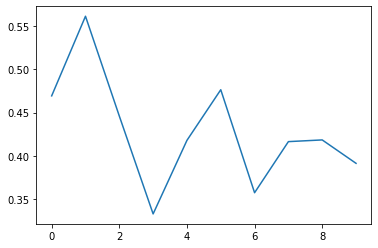

CPU times: user 4min 32s, sys: 4.81 s, total: 4min 37s
Wall time: 4min 38s


In [59]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10 #epoch count

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        
        #backward and optimize
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()


## Move to GPU

In [60]:
#reference a variable to gpu card
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [0]:
#function to do evaluation (calculate the accuracy) in gpu
def evaluation(dataloader):
    total, correct = 0, 0
    
    #keeping the network in evaluation mode
    net.eval()
    for data in dataloader:
        inputs, labels = data
        #moving the inputs and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
#create the model object and move it to GPU
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 79.10, Train acc: 80.63
Epoch: 1/10, Test acc: 82.22, Train acc: 83.40
Epoch: 2/10, Test acc: 83.97, Train acc: 85.53
Epoch: 3/10, Test acc: 84.22, Train acc: 85.87
Epoch: 4/10, Test acc: 85.42, Train acc: 87.19
Epoch: 5/10, Test acc: 86.56, Train acc: 88.32
Epoch: 6/10, Test acc: 85.93, Train acc: 88.02
Epoch: 7/10, Test acc: 87.02, Train acc: 89.13
Epoch: 8/10, Test acc: 86.75, Train acc: 89.12
Epoch: 9/10, Test acc: 87.32, Train acc: 89.45


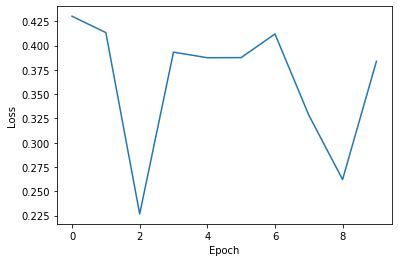

CPU times: user 4min 39s, sys: 4 s, total: 4min 43s
Wall time: 4min 44s


In [63]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):
    #iterate through all the batches in each epoch
    for i, data in enumerate(trainloader, 0):
        
        #keeping the network in training mode
        net.train()
    
        inputs, labels = data
        #moving the input and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        #clear the gradients
        opt.zero_grad()
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        #backward pass
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [64]:
#test on testing data

print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 87.32, Train acc: 89.45


## Basic Visulaization

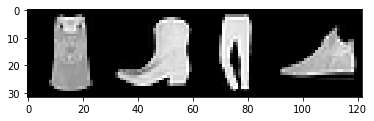

In [65]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [67]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [68]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 24, 24])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


NameError: ignored

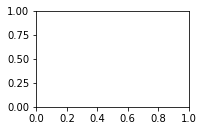

In [71]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()